# 0.0 RESUMO

## 0.1 - Introdução

##### As **hepatites** virais são um grave problema de saúde pública no Brasil e no mundo. É uma infecção que atinge o fígado, causando alterações leves, moderadas ou graves. Na maioria das vezes são infecções silenciosas, ou seja, não apresentam sintomas. Entretanto, quando presentes, podem se manifestar como: cansaço, febre, mal-estar, tontura, enjoo, vômitos, dor abdominal, pele e olhos amarelados, urina escura e fezes claras.
##### No Brasil, as hepatites virais mais comuns são causadas pelos vírus A, B e C. Existem ainda, com menor frequência, o vírus da hepatite D (mais comum na região Norte do país) e o vírus da hepatite E, que é menos frequente no Brasil, sendo encontrado com maior facilidade na África e na Ásia. 
##### As infecções causadas pelos vírus das hepatites B ou C frequentemente se tornam crônicas. Contudo, por nem sempre apresentarem sintomas, grande parte das pessoas desconhecem ter a infecção. Isso faz com que a doença possa evoluir por décadas sem o devido diagnóstico. O avanço da infecção compromete o fígado sendo causa de fibrose avançada ou de cirrose, que podem levar ao desenvolvimento de câncer e necessidade de transplante do órgão. 
##### O impacto dessas infecções acarreta em aproximadamente 1,4 milhões de mortes anualmente no mundo, seja por infecção aguda, câncer hepático ou cirrose associada as hepatites. A taxa de mortalidade da hepatite C, por exemplo, pode ser comparada ao HIV e tuberculose.
##### Atualmente há vacinas contra a hepatite A e hepatite B. Contudo, apesar de não ter vacina contra a hepatite C, é imprescindível que as pessoas portadoras do vírus da hepatite C sejam vacinadas contra a hepatite A e hepatite B para evitar possíveis complicações, com cirrose com necessidade de transplante hepático, em alguns casos, ou câncer no fígado, por exemplo.
##### Inicialmente, em nossas análises, faremos um passeio sobre os dados de todas as doses de imunos aplicadas no país em 2018, para que possamos ter uma noção de quanta atenção cada estado recebeu em relação às mesmas. Após essa verificação inicial, iremos nos ater às vacinas dadas contra as hepatites virais e descobrir se a quantidade de casos ocorridos em cada região no mesmo ano possui ligação com o número de vacinações também em cada região.

## 0.2 - Fontes / Links

* **IMUNIZAÇÕES** - COBERTURA - BRASIL - http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def

* **HEPATITES VIRAIS** - CASOS CONFIRMADOS POR UF DE RESIDÊNCIA NOTIFICADOS NO SISTEMA DE INFORMAÇÃO DE AGRAVOS DE NOTIFICAÇÃO - BRASIL - http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/hepabr.def

* **Hepatites virais** - https://www.saude.pr.gov.br/Pagina/Hepatites-virais#

* **Entendendo mais sobre a hepatite: causas, tipos e prevenção** - https://protegervacinas.com.br/blog/entendendo-mais-sobre-a-hepatite-causas-tipos-e-prevencao/

* **Hepatite C** - https://www.tuasaude.com/vacina-para-hepatite-c/

* **Dados das Regiões do país** - https://pt.wikipedia.org/wiki/Regi%C3%B5es_do_Brasil

# 1.0 - CARREGAMENTOS, IMPORTS, FUNÇÕES E DADOS AUXILIARES

## 1.1 - Importação de módulos

In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

## 1.2 - Carregamento dos dados

In [657]:
vacinas = pd.read_csv('dados/Doses Cáculos CV por UF e Imuno em 2018.csv', encoding = 'ISO-8859-1', sep = ';',
                   skiprows=3, skipfooter=19)
casos_hepatite = pd.read_csv('dados/Hepatites Virais Brasil 2018.csv', encoding = 'ISO-8859-1', 
                             sep = ';', skiprows = 3, skipfooter = 19)
populacao = pd.read_excel('dados/Estimativas populacao 2018.xls', skiprows=1, 
                         usecols= [0,2], skipfooter=6)

In [658]:
vacinas.head(2)

,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
0,11 Rondônia,24805,24267,25652,26528,26870,26529,27399,27046,2,...,27117,21106,14275,26553,1127,73143,18928,12836,16474,533293
1,12 Acre,15839,14836,12926,11899,11003,10962,14016,12207,-,...,13051,11337,9317,10979,822,26056,9905,7208,9854,255893


In [659]:
# podemos perceber que há apenas 2 colunas que nos interessam: "UF de residência" e "Total".
casos_hepatite.tail(5)

,UF de residência,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,469,-,-,-,469
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,720,-,-,720
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,808,-,808
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,270,270
27,Total,780,594,1114,177,623,94,196,563,188,...,2600,10840,3176,2433,6442,469,720,808,270,38887


In [660]:
populacao.tail(10)

,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
23,São Paulo,45538936
24,Região Sul,29754036
25,Paraná,11348937
26,Santa Catarina,7075494
27,Rio Grande do Sul,11329605
28,Região Centro-Oeste,16085885
29,Mato Grosso do Sul,2748023
30,Mato Grosso,3441998
31,Goiás,6.921.161 (***)
32,Distrito Federal,2.974.703 (***)


## 1.3 - Funções auxiliares

#### retirada de asteriscos

In [661]:
def retira_asteriscos_e_pontos(df, coluna):
    valores = []
    for linha in df[coluna]:
        string = str(linha).split(' ')[0]
        string = string.replace('.', '')
        valores.append(string)
    df[coluna] = valores

# 2.0 - DESCRIÇÃO DOS DADOS

## 2.1 - Tamanho dos datasets

In [662]:
print(f'Número de linhas do dataset de imunos(todas as vacinas): {vacinas.shape[0]}')
print(f'Número de colunas do dataset de imunos(todas as vacinas): {vacinas.shape[1]}')

Número de linhas do dataset de imunos(todas as vacinas): 28
Número de colunas do dataset de imunos(todas as vacinas): 25


In [663]:
print(f'Número de linhas do dataset de casos de hepatite: {casos_hepatite.shape[0]}')
print(f'Número de colunas do dataset de casos de hepatite:: {casos_hepatite.shape[1]}')

Número de linhas do dataset de casos de hepatite: 28
Número de colunas do dataset de casos de hepatite:: 29


## 2.2 - Verificando e alterando tipos de dados e dados nulos

In [664]:
vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 25 columns):
Unidade da Federação                             28 non-null object
072 BCG                                          28 non-null int64
099 Hepatite B  em crianças até 30 dias          28 non-null int64
061 Rotavírus Humano                             28 non-null int64
053 Meningococo C                                28 non-null int64
073 Hepatite B                                   28 non-null int64
080 Penta                                        28 non-null int64
012 Pneumocócica                                 28 non-null int64
074 Poliomielite                                 28 non-null int64
100 Poliomielite 4 anos                          28 non-null object
006 Febre Amarela                                28 non-null int64
096 Hepatite A                                   28 non-null int64
091 Pneumocócica(1º ref)                         28 non-null int64
092 Meningococo C (1º re

In [665]:
vacinas.isnull().sum()

Unidade da Federação                             0
072 BCG                                          0
099 Hepatite B  em crianças até 30 dias          0
061 Rotavírus Humano                             0
053 Meningococo C                                0
073 Hepatite B                                   0
080 Penta                                        0
012 Pneumocócica                                 0
074 Poliomielite                                 0
100 Poliomielite 4 anos                          0
006 Febre Amarela                                0
096 Hepatite A                                   0
091 Pneumocócica(1º ref)                         0
092 Meningococo C (1º ref)                       0
093 Poliomielite(1º ref)                         0
021 Tríplice Viral  D1                           0
098 Tríplice Viral  D2                           0
097 Tetra Viral(SRC+VZ)                          0
075 DTP                                          0
102 DTP REF (4 e 6 anos)       

In [666]:
casos_hepatite.dtypes

UF de residência    object
RO                  object
AC                  object
AM                  object
RR                  object
PA                  object
AP                  object
TO                  object
MA                  object
PI                  object
CE                  object
RN                  object
PB                  object
PE                  object
AL                  object
SE                  object
BA                  object
MG                  object
ES                  object
RJ                  object
SP                  object
PR                  object
SC                  object
RS                  object
MS                  object
MT                  object
GO                  object
DF                  object
Total                int64
dtype: object

In [667]:
''' 
Apesar da visualização acima mostrar que não há dados nulos, verificamos que a coluna 
'100 Poliomielite 4 anos' foi inserida pelo Python como sendo do tipo 'object', pois há linhas 
preenchidas com o caractere '-', provavelmente por falta de dados. Vamos verificar a quantidade de 
ocorrências desse caractere: 
'''

vacinas[vacinas['100 Poliomielite 4 anos'] == '-']


,Unidade da Federação,072 BCG,099 Hepatite B em crianças até 30 dias,061 Rotavírus Humano,053 Meningococo C,073 Hepatite B,080 Penta,012 Pneumocócica,074 Poliomielite,100 Poliomielite 4 anos,...,021 Tríplice Viral D1,098 Tríplice Viral D2,097 Tetra Viral(SRC+VZ),075 DTP,102 DTP REF (4 e 6 anos),103 Dupla Adulto (dt),095 Tríplice Bacteriana(DTP)(1º ref),094 Dupla adulto e tríplice acelular gestante,003 dTpa gestante,Total
1,12 Acre,15839,14836,12926,11899,11003,10962,14016,12207,-,...,13051,11337,9317,10979,822,26056,9905,7208,9854,255893
5,16 Amapá,15924,14214,11861,10565,10040,9776,12149,10650,-,...,11946,9901,7930,9794,848,25547,8078,7556,8861,231821


In [668]:
# vamos preencher essas linhas com o valor 0, para podermos alterar o tipo de dado para int
vacinas['100 Poliomielite 4 anos'].replace('-', '0', inplace = True)

In [669]:
# agora vamos alterar o tipo da coluna
vacinas['100 Poliomielite 4 anos'] = vacinas['100 Poliomielite 4 anos'].astype('int64')

In [670]:
vacinas.dtypes

Unidade da Federação                             object
072 BCG                                           int64
099 Hepatite B  em crianças até 30 dias           int64
061 Rotavírus Humano                              int64
053 Meningococo C                                 int64
073 Hepatite B                                    int64
080 Penta                                         int64
012 Pneumocócica                                  int64
074 Poliomielite                                  int64
100 Poliomielite 4 anos                           int64
006 Febre Amarela                                 int64
096 Hepatite A                                    int64
091 Pneumocócica(1º ref)                          int64
092 Meningococo C (1º ref)                        int64
093 Poliomielite(1º ref)                          int64
021 Tríplice Viral  D1                            int64
098 Tríplice Viral  D2                            int64
097 Tetra Viral(SRC+VZ)                         

## 2.3 - Verificação e alteração de Colunas

### 2.3.1 - Dataset vacinas

In [671]:
pd.DataFrame(vacinas.columns)

,0
0,Unidade da Federação
1,072 BCG
2,099 Hepatite B em crianças até 30 dias
3,061 Rotavírus Humano
4,053 Meningococo C
5,073 Hepatite B
6,080 Penta
7,012 Pneumocócica
8,074 Poliomielite
9,100 Poliomielite 4 anos


In [672]:
# podemos perceber que as linhas da coluna com os nomes dos estados possuem números. Cada dezena 
# representa a região onde esse estado se encontra.
vacinas['Unidade da Federação']

0                11 Rondônia
1                    12 Acre
2                13 Amazonas
3                 14 Roraima
4                    15 Pará
5                   16 Amapá
6               17 Tocantins
7                21 Maranhão
8                   22 Piauí
9                   23 Ceará
10    24 Rio Grande do Norte
11                25 Paraíba
12             26 Pernambuco
13                27 Alagoas
14                28 Sergipe
15                  29 Bahia
16           31 Minas Gerais
17         32 Espírito Santo
18         33 Rio de Janeiro
19              35 São Paulo
20                 41 Paraná
21         42 Santa Catarina
22      43 Rio Grande do Sul
23     50 Mato Grosso do Sul
24            51 Mato Grosso
25                  52 Goiás
26       53 Distrito Federal
27                     Total
Name: Unidade da Federação, dtype: object

#### Criação da coluna "Regiao"

In [673]:
# antes de retirarmos esses números, vamos utilizá-los para criar uma coluna com o nome da região, pois
# utilizaremos esses dados mais tarde
vacinas.loc[vacinas['Unidade da Federação'].str[0] == '1', 'Regiao'] = 'Norte'
vacinas.loc[vacinas['Unidade da Federação'].str[0] == '2', 'Regiao'] = 'Nordeste'
vacinas.loc[vacinas['Unidade da Federação'].str[0] == '3', 'Regiao'] = 'Sudeste'
vacinas.loc[vacinas['Unidade da Federação'].str[0] == '4', 'Regiao'] = 'Sul'
vacinas.loc[vacinas['Unidade da Federação'].str[0] == '5', 'Regiao'] = 'Centro-Oeste'

#### Renomeando as colunas

In [674]:
# renomear colunas
nomes = []
for coluna in vacinas:
    if coluna[0] == '0' or coluna[0] == '1':
        nome_alterado = coluna[4:]
        nomes.append(nome_alterado)
    else:
        nomes.append(coluna)

In [675]:
vacinas.columns = nomes

In [676]:
vacinas.columns

Index(['Unidade da Federação', 'BCG', 'Hepatite B  em crianças até 30 dias',
       'Rotavírus Humano', 'Meningococo C', 'Hepatite B', 'Penta',
       'Pneumocócica', 'Poliomielite', 'Poliomielite 4 anos', 'Febre Amarela',
       'Hepatite A', 'Pneumocócica(1º ref)', 'Meningococo C (1º ref)',
       'Poliomielite(1º ref)', 'Tríplice Viral  D1', 'Tríplice Viral  D2',
       'Tetra Viral(SRC+VZ)', 'DTP', 'DTP REF (4 e 6 anos)',
       'Dupla Adulto (dt)', 'Tríplice Bacteriana(DTP)(1º ref)',
       'Dupla adulto e tríplice acelular gestante', 'dTpa gestante', 'Total',
       'Regiao'],
      dtype='object')

In [677]:
vacinas.head()

,Unidade da Federação,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,...,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Dupla Adulto (dt),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total,Regiao
0,11 Rondônia,24805,24267,25652,26528,26870,26529,27399,27046,2,...,21106,14275,26553,1127,73143,18928,12836,16474,533293,Norte
1,12 Acre,15839,14836,12926,11899,11003,10962,14016,12207,0,...,11337,9317,10979,822,26056,9905,7208,9854,255893,Norte
2,13 Amazonas,74056,69054,61042,60444,60794,60278,68492,60189,90,...,59542,44657,60366,3709,193796,52651,43307,54128,1377647,Norte
3,14 Roraima,15138,14576,10465,9665,9910,9609,10950,9089,24,...,10070,8188,9636,1453,28239,8956,4577,6994,225777,Norte
4,15 Pará,115103,102661,97161,88535,79467,78662,106786,93892,10,...,80684,64751,78731,5260,199063,72060,58680,74955,1914032,Norte


#### Alterando o índice e ajustando seus nomes

In [678]:
# vamos utilizar a coluna "Unidade da Federação" como índice em nosso dataset
# antes, vamos retirar os números que estão na frente dos nomes dos estados

vacinas['Unidade da Federação'][vacinas['Unidade da Federação'] != 'Total'] = vacinas['Unidade da Federação'].str[3:]

In [679]:
# alterando o índice
vacinas.set_index('Unidade da Federação', inplace = True)

In [680]:
vacinas.head()

,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,...,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Dupla Adulto (dt),Tríplice Bacteriana(DTP)(1º ref),Dupla adulto e tríplice acelular gestante,dTpa gestante,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,24805,24267,25652,26528,26870,26529,27399,27046,2,23879,...,21106,14275,26553,1127,73143,18928,12836,16474,533293,Norte
Acre,15839,14836,12926,11899,11003,10962,14016,12207,0,10468,...,11337,9317,10979,822,26056,9905,7208,9854,255893,Norte
Amazonas,74056,69054,61042,60444,60794,60278,68492,60189,90,53391,...,59542,44657,60366,3709,193796,52651,43307,54128,1377647,Norte
Roraima,15138,14576,10465,9665,9910,9609,10950,9089,24,8389,...,10070,8188,9636,1453,28239,8956,4577,6994,225777,Norte
Pará,115103,102661,97161,88535,79467,78662,106786,93892,10,85682,...,80684,64751,78731,5260,199063,72060,58680,74955,1914032,Norte


### 2.3.2 - Dataset casos_hepatite

#### Excluindo colunas

In [681]:
# precisamos apenas do estado de residência e do total de casos em 2018
casos_hepatite = casos_hepatite[['UF de residência', 'Total']]

#### Renomeando coluna

In [682]:
casos_hepatite.columns = ['Unidade da Federação', 'Total']

#### Criação da coluna Regiao

In [683]:
casos_hepatite.loc[casos_hepatite['Unidade da Federação'].str[0] == '1', 'Regiao'] = 'Norte'
casos_hepatite.loc[casos_hepatite['Unidade da Federação'].str[0] == '2', 'Regiao'] = 'Nordeste'
casos_hepatite.loc[casos_hepatite['Unidade da Federação'].str[0] == '3', 'Regiao'] = 'Sudeste'
casos_hepatite.loc[casos_hepatite['Unidade da Federação'].str[0] == '4', 'Regiao'] = 'Sul'
casos_hepatite.loc[casos_hepatite['Unidade da Federação'].str[0] == '5', 'Regiao'] = 'Centro-Oeste'

#### Alteração dos nomes dos estados

In [684]:
casos_hepatite['Unidade da Federação'][casos_hepatite['Unidade da Federação'] != 'Total'] = casos_hepatite['Unidade da Federação'].str[3:]

#### Alteração do índice

In [685]:
casos_hepatite.set_index('Unidade da Federação', inplace = True)

In [686]:
casos_hepatite.head()

,Total,Regiao
Unidade da Federação,,
Rondônia,780,Norte
Acre,594,Norte
Amazonas,1114,Norte
Roraima,177,Norte
Pará,623,Norte


### 2.3.3 - Dataset populacao

#### Alteração dos nomes das colunas

In [687]:
populacao.columns = ['brasil e uf', 'populacao']

In [688]:
# verificando se as 5 regiões estão no dataset
populacao[populacao['brasil e uf'].str[:6] == 'Região']

,brasil e uf,populacao
1,Região Norte,18182253
9,Região Nordeste,56760780
19,Região Sudeste,87711946
24,Região Sul,29754036
28,Região Centro-Oeste,16085885


In [689]:
# há valores que possuem parênteses e asterisco(s). Devemos retirá-los
populacao['populacao']

0           208494900
1            18182253
2             1757589
3              869265
4             4080611
5              576568
6             8513497
7              829494
8             1555229
9            56760780
10            7035055
11      3.264.531 (*)
12      9.075.649 (*)
13            3479010
14            3996496
15     9.496.294 (**)
16     3.322.820 (**)
17            2278308
18           14812617
19           87711946
20           21040662
21            3972388
22           17159960
23           45538936
24           29754036
25           11348937
26            7075494
27           11329605
28           16085885
29            2748023
30            3441998
31    6.921.161 (***)
32    2.974.703 (***)
Name: populacao, dtype: object

In [690]:
retira_asteriscos_e_pontos(populacao, 'populacao')

In [691]:
populacao['populacao']

0     208494900
1      18182253
2       1757589
3        869265
4       4080611
5        576568
6       8513497
7        829494
8       1555229
9      56760780
10      7035055
11      3264531
12      9075649
13      3479010
14      3996496
15      9496294
16      3322820
17      2278308
18     14812617
19     87711946
20     21040662
21      3972388
22     17159960
23     45538936
24     29754036
25     11348937
26      7075494
27     11329605
28     16085885
29      2748023
30      3441998
31      6921161
32      2974703
Name: populacao, dtype: object

#### Alteração dos tipos de dados

In [774]:
populacao.dtypes

brasil e uf    object
populacao      object
dtype: object

In [775]:
populacao['populacao'] = populacao['populacao'].astype('int64')

In [776]:
populacao.dtypes

brasil e uf    object
populacao       int64
dtype: object

### 2.3.4 - Dataset hepatite

In [692]:
# esse dataset vai juntar os dados de vacinações de hepatites virais (tipos A e B) em 2018
# com os dados de casos, também de hepatites virais, notificados por UF de residência em 2018

#### 2.4.1 - Criação do dataset

In [747]:
hepatite = pd.DataFrame([vacinas['Hepatite B'], vacinas['Hepatite A'], casos_hepatite['Total']],
                       index = ['vacinas hepatite B', 'vacinas hepatite A', 'casos hepatite'])

In [748]:
hepatite = hepatite.T

#### 2.4.2 - Coluna total de vacinas (A + B)

In [749]:
hepatite['total de vacinas'] = hepatite['vacinas hepatite B'] + hepatite['vacinas hepatite A']

#### 2.4.3 - Criação da coluna região

In [750]:
hepatite['regiao'] = np.nan

In [751]:
hepatite['regiao'][:7] = 'Norte'
hepatite['regiao'][7:16] = 'Nordeste'
hepatite['regiao'][16:20] = 'Sudeste'
hepatite['regiao'][20:23] = 'Sul'
hepatite['regiao'][23:27] = 'Centro-Oeste'

#### 2.4.4 - Alteração da ordem das colunas

In [754]:
hepatite = hepatite[['regiao', 'casos hepatite', 'vacinas hepatite B', 'vacinas hepatite A', 
                     'total de vacinas']]

# 3.0 - ANÁLISE EXPLORATÓRIA

___________________________________________________________________________________________________

**Agora vamos analisar um pouco dos nossos dados através dos gráficos disponíveis.**

____

#### Quantidade total de vacinas aplicadas em cada estado

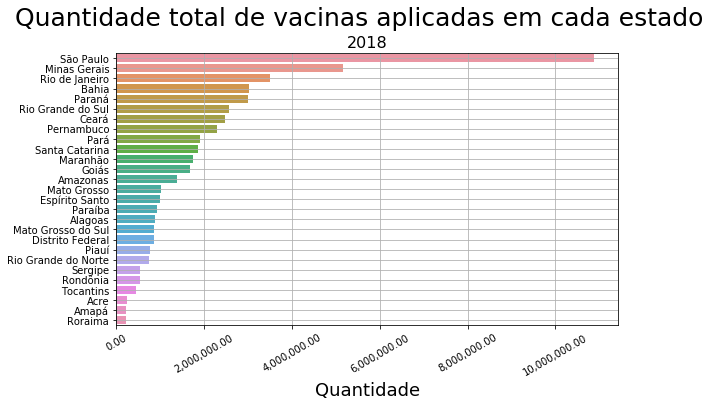

In [696]:
total_estado = vacinas.Total[:27]
total_estado.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (9,5))
plt.suptitle('Quantidade total de vacinas aplicadas em cada estado', fontsize = 25, y = 1.01)
plt.title('2018', fontsize = 16)
ax = sns.barplot(x = total_estado.values, y = total_estado.index, orient = 'h')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('Quantidade', fontsize = 18)
plt.ylabel('')
plt.xticks(rotation = 30)
plt.grid()
plt.show()

#### Quantidade total de aplicações de cada vacina no país

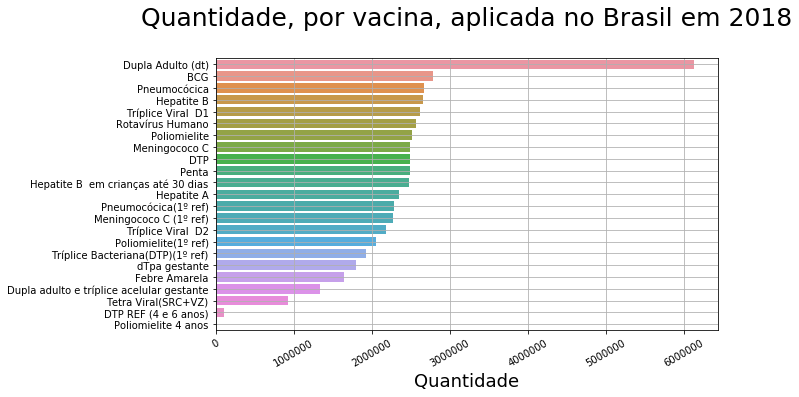

In [697]:
colunas = vacinas.drop(['Total', 'Regiao'], axis = 1).columns
totais = vacinas.loc['Total', colunas]
totais.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (9,5))
plt.title('Quantidade, por vacina, aplicada no Brasil em 2018', fontsize = 25, y = 1.1)
ax = sns.barplot(x =  totais.sort_values(ascending = False), 
            y = totais.index, orient = 'h') 
plt.xlabel('Quantidade', fontsize = 18)
plt.xticks(rotation = 30)
plt.grid()
plt.show()

#### Quantidade de vacinas aplicadas em cada região do país

In [698]:
# vamos, primeiramente, separar a soma de vacinas aplicadas em cada região
total_norte = vacinas['Total'][vacinas['Regiao'] == 'Norte'].sum()
total_nordeste = vacinas['Total'][vacinas['Regiao'] == 'Nordeste'].sum()
total_sudeste = vacinas['Total'][vacinas['Regiao'] == 'Sudeste'].sum()
total_sul = vacinas['Total'][vacinas['Regiao'] == 'Sul'].sum()
total_centro_oeste = vacinas['Total'][vacinas['Regiao'] == 'Centro-Oeste'].sum()

por_regiao = pd.DataFrame([total_norte, total_nordeste, total_sudeste, total_sul, total_centro_oeste],
                         index=['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste'],
                         columns= ['total'])

por_regiao.sort_values(by = 'total', ascending = False, inplace = True)

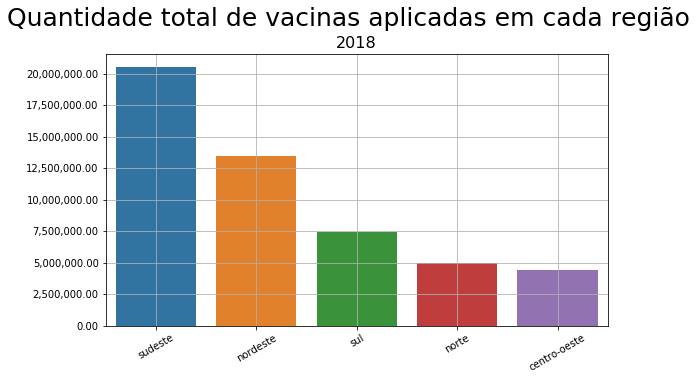

In [699]:
total_estado = vacinas.Total[:27]
total_estado.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (9,5))
plt.suptitle('Quantidade total de vacinas aplicadas em cada região', fontsize = 25, y = 1.01)
plt.title('2018', fontsize = 16)
ax = sns.barplot(x = por_regiao.index, y = por_regiao.total)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('')
plt.xticks(rotation = 30)
plt.grid()
plt.show()

#### Vacinas mais aplicadas em São Paulo

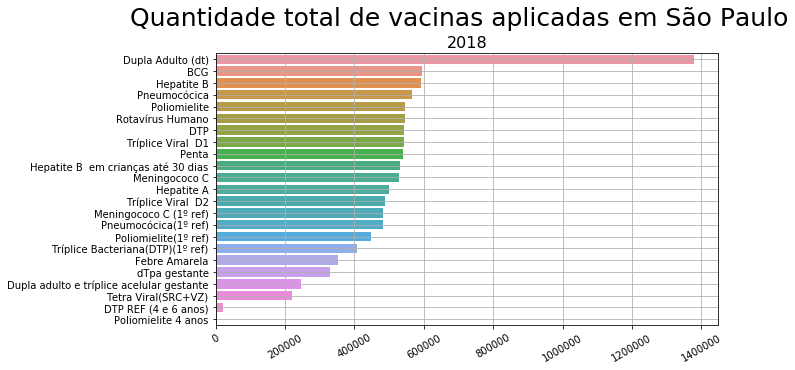

In [700]:
sao_paulo = vacinas.drop(['Total', 'Regiao'], axis = 1).loc['São Paulo']
sao_paulo.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (9,5))
plt.suptitle('Quantidade total de vacinas aplicadas em São Paulo', fontsize = 25, y = 1.01)
plt.title('2018', fontsize = 16)
sns.barplot(x = sao_paulo.values, y = sao_paulo.index,
           orient = 'h')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('')
plt.xticks(rotation = 30)
plt.grid()
plt.show()

#### Número de casos de hepatites virais no Brasil em 2018, por estado

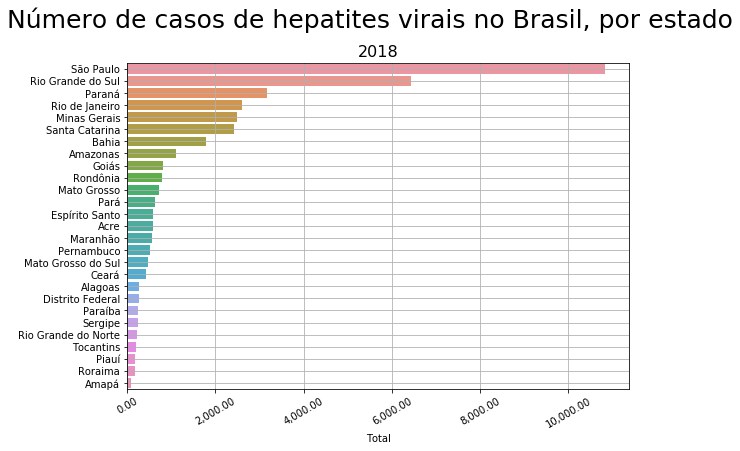

In [701]:
casos_hepatite_ordenado = casos_hepatite.loc[casos_hepatite.index != 'Total']
casos_hepatite_ordenado.sort_values(by = 'Total', ascending = False, inplace = True)
casos_hepatite_ordenado

plt.figure(figsize = (9,6))
plt.suptitle('Número de casos de hepatites virais no Brasil, por estado', fontsize = 25, y = 1.01)
plt.title('2018', fontsize = 16)
ax = sns.barplot(x = casos_hepatite_ordenado['Total'],
                y = casos_hepatite_ordenado.index)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylabel('')
plt.xticks(rotation = 30)
plt.grid()
plt.show()

# 4.0 - HEPATITE - HIPÓTESES

### HIPÓTESE: regiões com menor número de vacinas de hepatite por habitante tiveram maiores números de casos da doença

#### Número de vacinas de hepatite (A e B) por habitante de cada região

In [800]:
vacinas_por_habitante_norte = hepatite['total de vacinas'][hepatite['regiao'] == 'Norte'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Norte']
vacinas_por_habitante_nordeste = hepatite['total de vacinas'][hepatite['regiao'] == 'Nordeste'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Nordeste']
vacinas_por_habitante_sudeste = hepatite['total de vacinas'][hepatite['regiao'] == 'Sudeste'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Sudeste']
vacinas_por_habitante_sul = hepatite['total de vacinas'][hepatite['regiao'] == 'Sul'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Sul']
vacinas_por_habitante_centro_oeste = hepatite['total de vacinas'][hepatite['regiao'] == 'Centro-Oeste'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Centro-Oeste']

vacinas_por_habitante = pd.DataFrame([vacinas_por_habitante_norte.values, 
                                   vacinas_por_habitante_nordeste.values,
                                   vacinas_por_habitante_sudeste.values, 
                                   vacinas_por_habitante_sul.values,
                                   vacinas_por_habitante_centro_oeste.values],
                                  index = ['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste'],
                                  columns = ['vacina por habitante']).sort_values(by = 'vacina por habitante',
                                                                                    ascending = False)
vacinas_por_habitante

,vacina por habitante
centro-oeste,0.025645
norte,0.024514
nordeste,0.024049
sul,0.024024
sudeste,0.023473


Podemos perceber, de início, que a quantidade de vacinas de hepatite por habitante é praticamente igual em cada uma das regiões do Brasil.

#### Número total de casos de hepatite por região

In [832]:
casos_hepatite_por_habitante_norte = hepatite['casos hepatite'][hepatite['regiao'] == 'Norte'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Norte']
casos_hepatite_por_habitante_nordeste = hepatite['casos hepatite'][hepatite['regiao'] == 'Nordeste'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Nordeste']
casos_hepatite_por_habitante_sudeste = hepatite['casos hepatite'][hepatite['regiao'] == 'Sudeste'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Sudeste']
casos_hepatite_por_habitante_sul = hepatite['casos hepatite'][hepatite['regiao'] == 'Sul'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Sul']
casos_hepatite_por_habitante_centro_oeste = hepatite['casos hepatite'][hepatite['regiao'] == 'Centro-Oeste'].sum() / populacao['populacao'][populacao['brasil e uf'] == 'Região Centro-Oeste']

casos_hepatite_por_regiao_e_habitante = pd.DataFrame([casos_hepatite_por_habitante_norte.values, 
                                   casos_hepatite_por_habitante_nordeste.values,
                                   casos_hepatite_por_habitante_sudeste.values, 
                                   casos_hepatite_por_habitante_sul.values,
                                   casos_hepatite_por_habitante_centro_oeste.values],
                                  index = ['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste'],
                                  columns = ['casos na regiao']).sort_values(by = 'casos na regiao',
                                                                                    ascending = False)

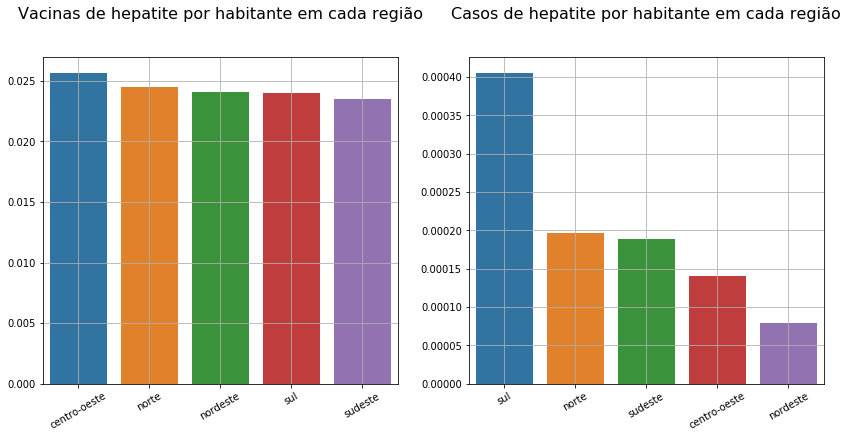

In [862]:
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
plt.title('Vacinas de hepatite por habitante em cada região', fontsize = 16, y = 1.1)
ax = sns.barplot(x = vacinas_por_habitante.index,
                y = vacinas_por_habitante['vacina por habitante'], palette = 'tab10')
plt.ylabel('')
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(1,2,2)
plt.title('Casos de hepatite por habitante em cada região', fontsize = 16, y = 1.1)
ax = sns.barplot(x = casos_hepatite_por_regiao_e_habitante.index,
                y = casos_hepatite_por_regiao_e_habitante['casos na regiao'], palette = 'tab10')
plt.ylabel('')
plt.xticks(rotation = 30)
plt.grid()

plt.show()

##### Ao que parece, o número de vacinas por habitante não foi fator determinante para o número de casos de hepatites virais em cada uma das regiões do país. Temos, inclusive, uma diferença quase que imperceptível entre o número de vacinas por habitante em cada região.
##### Observando que a região Centro-Oeste foi a região que aplicou a maior quantidade de vacinas contra hepatites virais (mesmo com tão pouca diferença), poderíamos pensar que esse número está diretamente ligado ao fato de a mesma região ser apenas a penúltima no número de casos por habitante. Contudo, podemos observar, por exemplo, a região Norte, que obteve em 2018 o segundo maior número de vacinas por habitante e o segundo maior número de casos de hepatite por habitante, no mesmo ano.
#### **Conclusão**: Não há como afirmar que o número de vacinas de hepatites virais por habitante, em cada região, em 2018, foi determinante para um menor número de casos de hepatites virais, em cada região, em 2018. Pode haver outros fatores diretamente ligados ao número de casos em cada regiao, como disseminação de informações sobre como evitar as doenças, investimentos em saneamento básico, etc.